In [15]:
! git clone https://github.com/Harivind/Data.git
! git clone https://github.com/Harivind/Kannada-OCR.git

Cloning into 'Kannada-OCR'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (312/312), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 67217 (delta 135), reused 183 (delta 117), pack-reused 66905
Receiving objects: 100% (67217/67217), 435.83 MiB | 21.46 MiB/s, done.
Resolving deltas: 100% (3101/3101), done.
Checking out files: 100% (63683/63683), done.


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.densenet import preprocess_input, DenseNet121


Using TensorFlow backend.


In [3]:
base_model=DenseNet121(weights="imagenet",include_top=False, input_shape=(100,100,3))
base_model.summary()














Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
___________________________________________________________________________

In [4]:
#base_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(657, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False



In [5]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [12]:
from keras.optimizers import SGD 
#model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(lr=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False), loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
batch_size=64
train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=45,width_shift_range=0.2, shear_range=0.2, preprocessing_function=preprocess_input, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        './Data/Hnd/Img/',  # This is the source directory for training images
        target_size=(100,100),  
        batch_size=128,
        
        # Specify the classes explicitly
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

total_sample=train_generator.n

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


Found 16425 images belonging to 657 classes.


In [0]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=100,
        verbose=1)

In [0]:
model.save("./1st.h5")


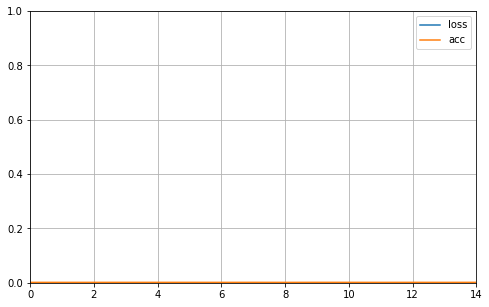

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()-